In [21]:
import numpy as np
import math
import tqdm

In [29]:
n = 250_000
m = 100
B = 2 ** 32
g = 1
eps = 1.
bound = (0, B)


def get_slice_parameters(bound: tuple[float, float],
                         m: int,
                         eps: float,
                         beta: float = 0.05,  # Hyperparameter
                         g: float = 1.  # Hyperparameter
                         ) -> int:
    return math.ceil((2 / eps) * np.log(4 * m * (bound[1] - bound[0]) / (g * beta)) - 1)


eps_em = (1 / 4) * eps
l = get_slice_parameters(bound, m, eps_em, g=g)
print("Used l: ", l)

# get n equally spaced ranks
quantiles = np.linspace(0, 1, m)[1:-1]  # Exclude 0 and 1
ranks = np.floor(quantiles * n).astype(int)

Used l:  249


In [30]:
def in_good(ranks: np.ndarray, l: int, n: int) -> bool:
    m = len(ranks)
    # look if at least two ranks are close to each other
    flag_spacing = any(ranks[i] - ranks[i - 1] < 2 * l + 1 for i in range(1, m))
    # look for at leasr noe rank is out of bounds
    flag_bounds = any(rank < l or rank > n - l - 1 for rank in ranks)
    if flag_spacing or flag_bounds:
        return False
    else:
        return True

In [40]:
from quantiles_with_continual_counting import KaryTreeNoise

eps_cc = eps / 2
num_exp = int(1e5)
count_not_good = 0
for _ in tqdm.tqdm(range(num_exp)):
    # Add Countinual Counting noise to the ranks
    tree = KaryTreeNoise(eps=eps_cc, max_time=m)
    noisy_ranks = [rank + tree.prefix_noise(i) for i, rank in enumerate(ranks, start=1)]
    # check if the ranks are in good
    if not in_good(noisy_ranks, l, n):
        count_not_good += 1

100%|██████████| 100000/100000 [00:36<00:00, 2777.12it/s]


In [44]:
prob_not_good = count_not_good / num_exp  # estimate the probability of not being good (delta)
print("Probability of not being good: ", prob_not_good)

Probability of not being good:  0.0


In [42]:
# gamma should be delta * B^m / (e^eps - 1)

# Plot width $w$

In [93]:
def width(m: int, bound: tuple[float, float], eps: float, gamma: float, g:float) -> float:
    """
    From corollary  6.3 of the paper
    """
    B = bound[1] - bound[0]
    return math.ceil((3 * np.log(m) / eps) * (m * np.log(B / g) + np.log(2 * m * (np.exp(eps)-1) / gamma)))

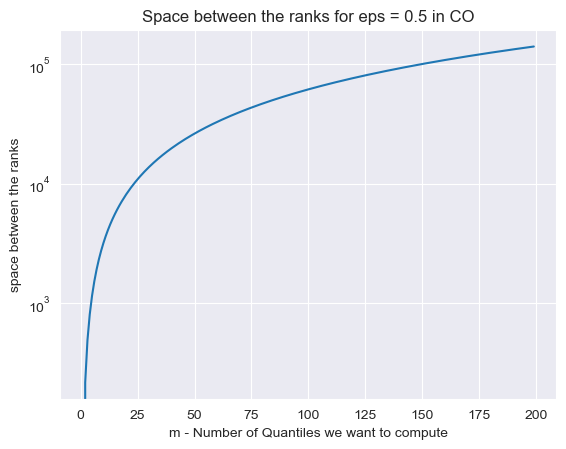

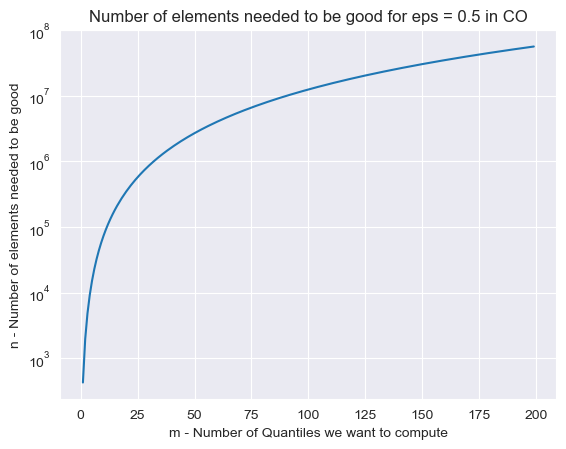

In [108]:
m = range(1, 200)
eps = 0.5
gamma = 0.001    # probability of returning a random value in SliceQuantiles
B = 2 ** 32 - 1  # For single precision
g = 1
bound = (0, B)
w = [width(m_i, bound, eps, gamma, g) for m_i in m]
# get l
l = [get_slice_parameters(bound, m_i, eps) for m_i in m]
# get space between the quantiles
space = [2 * (l_i + w_i) + 1 for l_i, w_i in zip(l, w)]
import matplotlib.pyplot as plt
plt.plot(m, w)
plt.xlabel("m - Number of Quantiles we want to compute")
plt.ylabel("space between the ranks")
plt.title("Space between the ranks for eps = 0.5 in CO")
plt.yscale("log")
plt.show()

# Compute minimum n needed to be good
n = [(m_i + 1) * (space_i + 1) + 1 for m_i, space_i in zip(m, space)]
plt.plot(m, n)
plt.xlabel("m - Number of Quantiles we want to compute")
plt.ylabel("n - Number of elements needed to be good")
plt.title("Number of elements needed to be good for eps = 0.5 in CO")
plt.yscale("log")
plt.show()

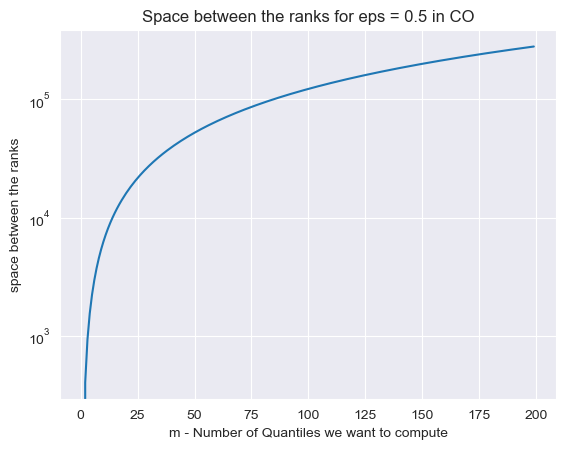

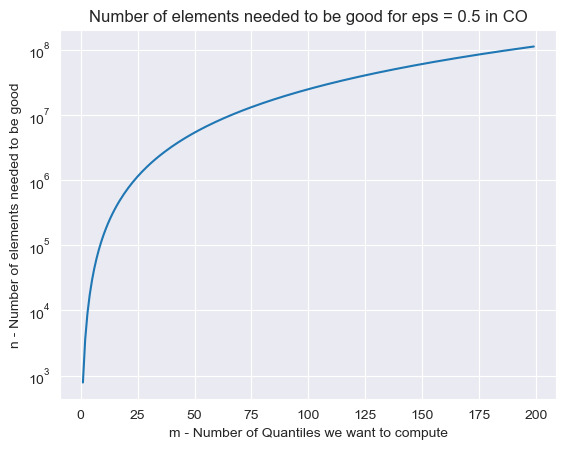

In [107]:
m = range(1, 200)
eps = 0.5
gamma = 0.001    # probability of returning a random value in SliceQuantiles
B = 2 ** 64 - 1  # For double precision
g = 1
bound = (0, B)
w = [width(m_i, bound, eps, gamma, g) for m_i in m]
# get l
l = [get_slice_parameters(bound, m_i, eps) for m_i in m]
# get space between the quantiles
space = [2 * (l_i + w_i) + 1 for l_i, w_i in zip(l, w)]
import matplotlib.pyplot as plt
plt.plot(m, w)
plt.xlabel("m - Number of Quantiles we want to compute")
plt.ylabel("space between the ranks")
plt.title("Space between the ranks for eps = 0.5 in CO")
plt.yscale("log")
plt.show()

# Compute minimum n needed to be good
n = [(m_i + 1) * (space_i + 1) + 1 for m_i, space_i in zip(m, space)]
plt.plot(m, n)
plt.xlabel("m - Number of Quantiles we want to compute")
plt.ylabel("n - Number of elements needed to be good")
plt.title("Number of elements needed to be good for eps = 0.5 in CO")
plt.yscale("log")
plt.show()